# Ableitungen, Steigung, Extremstellen, Krümmungsverhalten

In [1]:
# Import der benötigten Module
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
import micropip
await micropip.install("ipywidgets")
from ipywidgets import interactive, widgets, interact, IntSlider, Text
from IPython.display import display, Latex
%matplotlib inline

# Steigung

Das Steigungsdreieck ist ein geometrisches Hilfsmittel, das oft benutzt wird, um die Steigung einer Geraden in einem Koordinatensystem zu bestimmen.

Ein Steigungsdreieck ist ein rechtwinkliges Dreieck, das man zeichnet, indem man von einem Punkt auf der Geraden horizontal (entlang der $x$-Achse) und dann vertikal (entlang der $y$-Achse) zu einem anderen Punkt auf der Geraden geht. Die Hypotenuse des Dreiecks liegt dann auf der Geraden.

Die Steigung $m$ der Geraden ist gleich dem Verhältnis der vertikalen Veränderung, zur horizontalen Veränderung.

In mathematischen Begriffen, wenn man zwei Punkte auf der Geraden hat, $(x_1, y_1)$ und $(x_2, y_2)$, dann ist die Steigung $m$ der Geraden:

$m = (y_2 - y_1) / (x_2 - x_1)$

Die Steigung einer Geraden wird durch das Verhältnis der beiden Seiten des Steigungsdreiecks bestimmt. Dabei steht die vertikale Seite (entlang der y-Achse) für die Veränderung in der Höhe, und die horizontale Seite (entlang der x-Achse) für die Veränderung in der Breite. Wichtig zu beachten ist, dass die Steigung positiv ist, wenn die Gerade beim Blick von links nach rechts ansteigt. Fällt die Gerade hingegen beim Blick von links nach rechts ab, ist die Steigung negativ.

In der folgenden Grafik können Sie solch ein Dreieck wieder finden.

<center><img src="Steigungsdreieck.png"  width="45%" height="45%"></center><br>

Im folgenden Code-Block können Sie das Steigungsdreieck interaktiv verschieben.  

In [ ]:

def f(x):
    return x*2 + 2

x = np.linspace(-10, 10, 1000)
y = f(x)

x_value = 2
h = 1
x1, y1 = [x_value, x_value + h], [f(x_value), f(x_value)]
x2, y2 = [x_value + h, x_value + h], [f(x_value), f(x_value + h)]

plt.figure(figsize=(8, 6),dpi=150)
plt.plot(x, y, lw=2, color="lightblue", label="f(x) = 2x + 2")
plt.plot(x1, y1, x2, y2, color="black")
plt.scatter(x_value, f(x_value), color="red")

plt.text(x_value + h/2, f(x_value) - 0.5, 'horizontal (Δx)', ha='center')
plt.text(x_value + h + 0.2, f(x_value) + h, 'vertikal (Δy)', va='center')
plt.text(x_value, f(x_value) + 0.3, f'({x_value}, {f(x_value)})', ha='right')
plt.text(x_value + h, f(x_value) + h + 0.3, f'({x_value + h}, {f(x_value + h) })', ha='right')
plt.title("Steigungsdreieck einer linearen Funktion")

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 10)
plt.xlabel('x-Achse')
plt.ylabel('y-Achse')
plt.legend()

plt.show()


In [2]:
def f(x):
    return x*2 + 2

    
def plot(x_wert):
    
    x = np.linspace(-10,10,1000)
    y = f(x)
    print("Steigung im Punkt (",str(x_wert), ",",f(x_wert), ") beträgt: ", 2)
    h = 1
    x1, y1 = [x_wert, x_wert + h], [f(x_wert), f(x_wert)]
    x2, y2 = [x_wert + h, x_wert + h], [f(x_wert), f(x_wert + h)]

    plt.plot(x1, y1,x2,y2,color="black")

    plt.scatter(x_wert,f(x_wert),color="red")
    plt.plot(x, y, lw=2, color="lightblue")
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.grid()
    plt.show()

interactive(plot, x_wert = widgets.FloatSlider(min = -3, max = 1, step = 0.25, value = 0))

interactive(children=(FloatSlider(value=0.0, description='x_wert', max=1.0, min=-3.0, step=0.25), Output()), _…

# Ableitungen

Wie zuvor gesehen kann man für die Geraden die Steigung einer Funktion durch das Steigungsdreieck bestimmen. Für nicht-linearer Funktionen kommt der Differenzquotient zum Einsatz.

Die Definition des Differenzenquotienten für eine Funktion $f$ an der Stelle $x$ mit einer kleinen Änderung $h$ lautet:

Differenzenquotient = $\frac{{f(x + h) - f(x)}}{h}$

Dieser Ausdruck beschreibt die durchschnittliche Änderungsrate der Funktion $f$ über das Intervall $[x, x+h]$.

In der Praxis wird oft der Grenzwert dieses Quotienten für $h$ gegen $0$ betrachtet, um die instantane Änderungsrate zu bestimmen, das ist die Ableitung der Funktion $f$ an der Stelle $x$:

$f'(x) = \lim_{{h \to 0}} \frac{{f(x + h) - f(x)}}{h}$

Diese Ableitung ist die Steigung der Tangente an den Graphen der Funktion $f$ im Punkt $x$. Der Differenzenquotient ist also ein zentraler Begriff in der Differentialrechnung.

Nun sind Sie an der Reihe. In der nächsten Aufgabe werden Sie eine ähnliche Animation wieder finden, wie im vorherigen Kapitel. Hier sollen Sie diese erweitern. Schreiben Sie eine Funktion die eine Tangente an einem Punkt darstellt und deren Steigung durch den Differenzquotienten beschrieben wird.  



<div style= "color: black; background-color: powderblue; margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color: black; background-color: lightskyblue; margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 1</b></p> 
   
In dieser Aufgabe werden Sie Funktionen implementieren und nutzen, um die Konzepte der Ableitung und Tangenten in der Mathematik zu erkunden. Sie werden eine mathematische Funktion und ihre Ableitung definieren, eine Methode zur Approximation der Ableitung verwenden und die Tangente an einem Punkt der Funktion visualisieren.

1. **Funktionsimplementierung:**
   - Implementieren Sie die Funktion `f(x)`, die eine mathematische Funktion darstellt, die Sie selbst wählen (z.B. eine quadratische Funktion wie $x^2 $).
   - Implementieren Sie die Funktion `f_prime(x)`, die die Ableitung von `f(x)` repräsentiert. Für eine quadratische Funktion wäre dies beispielsweise $ 2x $.
   - Implementieren Sie zusätzlich die Funktion `f_prime_a(f, x, h)`, die den Differenzquotienten repräsentiert, eine Methode zur Approximation der Ableitung einer Funktion an einem Punkt `x` mit einer kleinen Änderung `h`.

2. **Entwicklung und Visualisierung der Tangentenfunktion:**
   - Vervollständigen Sie die Funktion `yd(x, x_wert)`. Diese Funktion soll die Gleichung einer Tangente an die Kurve der Funktion `f(x)` an einem bestimmten Punkt `x_wert` darstellen.
   - Nutzen Sie die Ableitung der Funktion `f(x)` am Punkt `x_wert` zur Bestimmung der Steigung der Tangente.
   - Implementieren Sie die Tangentengleichung: 
     $$ y = f'(x\_wert) \cdot (x - x\_wert) + f(x\_wert) $$
     Hierbei gibt $f'(x\_wert)$ die Steigung der Tangente an und $x\_wert$ den Punkt auf der x-Achse, an dem die Tangente die Funktion $f(x)$ berührt.

3. **Analyse der Auswirkungen von `h`:**
   - Untersuchen Sie, was passiert, wenn der Wert von `h` (die kleine Änderung in `f_prime_a(f, x, h)`) größer wird.
   - Beobachten und beschreiben Sie, wie sich die Genauigkeit der Tangentenapproximation ändert, wenn `h` variiert wird.

</div>

In [3]:
# 1
def f(x):
    return x**2

# 1
def f_prime(x):
    return 2*x 
    
# 1
def f_prime_a(f, x, h):
    return (f(x + h) - f(x)) / h
    
def plot(x_wert,h):

    x = np.linspace(-10,10,1000)
    y = f(x)
    print("Steigung am x-Wert ", str(x_wert), " beträgt: ", f_prime(x_wert))
    print("Approximation der Steigung am x-Wert ", str(x_wert), " beträgt: ", f_prime_a(f,x_wert,h))
    if x_wert < 0:
        x1, y1 = [x_wert, x_wert - h], [f(x_wert), f(x_wert)]
        x2, y2 = [x_wert - h, x_wert - h], [f(x_wert), f(x_wert - h)]
    else:
        x1, y1 = [x_wert, x_wert + h], [f(x_wert), f(x_wert)]
        x2, y2 = [x_wert + h, x_wert + h], [f(x_wert), f(x_wert + h)]
    plt.figure(figsize=(8, 6),dpi=75)
    plt.plot(x1, y1,x2,y2,color="black")
    
    # 2
    def yd(x,x_wert):
        return f_prime_a(f,x_wert,h) * (x - x_wert) + f(x_wert)
    
    plt.plot(x,yd(x,x_wert),color="black")

    plt.scatter(x_wert,f(x_wert),color="red")
    plt.plot(x, y, lw=2, color="lightblue")
    ax = plt.subplot()
    plt.xlim(-5, 5)
    plt.ylim(-1, 9)
    plt.show()

interactive(plot,  x_wert = widgets.FloatSlider(min = -3, max = 3, step = 0.25, value = 0),h = widgets.FloatSlider(min = 1E-8, max = 2, step = 0.00125, value = 2))

interactive(children=(FloatSlider(value=0.0, description='x_wert', max=3.0, min=-3.0, step=0.25), FloatSlider(…

## Ableitungen mit Sympy

SymPy ist eine Python-Bibliothek für symbolische Mathematik, die es ermöglicht, mathematische Ausdrücke präzise und in einer Form darzustellen, die der handschriftlichen Form sehr nahe kommt. Sie eignet sich hervorragend für Aufgaben wie das Differenzieren von Funktionen. 

In SymPy müssen Sie zuerst symbolische Variablen definieren, bevor Sie sie in Ausdrücken verwenden können. Zum Beispiel:

In [2]:
import sympy as sp

x = sp.symbols('x')

Mit SymPy können Sie mathematische Funktionen definieren. Zum Beispiel:

In [4]:
f = x**2 + 3*x + 5
f

x**2 + 3*x + 5

Das Ableiten einer Funktion mit SymPy ist einfach. Sie verwenden die diff()-Funktion. Zum Beispiel, um die erste Ableitung der Funktion f zu finden, würden Sie schreiben:

In [5]:
df1 = sp.diff(f, x)
df1

2*x + 3

Sie können auch höhere Ableitungen berechnen. Zum Beispiel, um die zweite Ableitung zu finden, würden Sie:

In [6]:
df2 = sp.diff(f, x, 2)
df2

2

SymPy ermöglicht es Ihnen auch, den Wert einer Ableitung an einem bestimmten Punkt zu berechnen. Zum Beispiel, um den Wert der ersten Ableitung von f bei x = 1 zu finden, würden Sie:

In [7]:
f_at_1 = f.subs(x,1)
f_at_1

9

Nun sollen Sie die Methoden selbst ausprobieren.

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 2</b>  </p> 
    
Das Ziel dieser Aufgabe ist es, Ihre Fähigkeiten im Umgang mit SymPy zu vertiefen, indem Sie eine Funktion definieren, ihre Ableitung bestimmen und dann die Ableitung an einem bestimmten Punkt auswerten.

1. **Funktion definieren:**
   - Verwenden Sie SymPy, um eine symbolische Variable `x` zu definieren.
   - Definieren Sie eine Funktion $f(x) =  x^4 + 3x^2 + 5 $.

2. **Ableitung der Funktion bestimmen:**
   - Berechnen Sie die erste Ableitung der Funktion $f(x)$ und speichern Sie sie in einer Variablen `f_prime`.

3. **Auswertung der Ableitung:**
   - Bestimmen Sie den Wert der Ableitung `f_prime` an der Stelle $x = 2$. Speichern Sie das Ergebnis in einer Variablen `f_prime_at_2`.



In [13]:
# ???
x = sp.symbols('x')
f2 = x**4 + 3*x**2 + 5
f_prime = sp.diff(f2, x)
f_prime_at_2 = f_prime.subs(x,2)

# Extremstellen

Extremstellen sind Punkte auf der Graphenkurve einer Funktion, an denen entweder ein lokales Maximum oder ein lokales Minimum erreicht wird.

Ein lokales Maximum ist ein Punkt, an dem die Funktion einen höheren Wert hat als in allen unmittelbar benachbarten Punkten. Ebenso ist ein lokales Minimum ein Punkt, an dem die Funktion einen niedrigeren Wert hat als in allen unmittelbar benachbarten Punkten.

Es gibt auch globale Extremstellen, bei denen die Funktion ihr absolutes Maximum oder Minimum erreicht, das heißt, es sind die höchsten oder niedrigsten Punkte auf dem gesamten Graphen der Funktion.

Extremstellen können durch verschiedene Methoden bestimmt werden. Eine gebräuchliche Methode ist die Verwendung der Ableitung der Funktion. Extremstellen treten auf, wenn die erste Ableitung der Funktion gleich Null ist und die zweite Ableitung nicht null ist.

Wenn $f'(x) = 0$ und $f''(x) < 0$, dann hat die Funktion $f$ an der Stelle $x$ ein lokales Maximum. Wenn $f'(x) = 0$ und $f''(x) > 0$, dann hat die Funktion $f$ an der Stelle x ein lokales Minimum.

Eine weitere Methode zur Bestimmung von Extremstellen ist die Untersuchung des Vorzeichenswechsels der ersten Ableitung. Ändert sich das Vorzeichen von $f'(x)$ von positiv auf negativ, liegt ein lokales Maximum vor, wechselt es von negativ auf positiv, handelt es sich um ein lokales Minimum.

Beachten Sie jedoch, dass nicht jeder Punkt, an dem die erste Ableitung null ist, eine Extremstelle ist. Dies könnte auch ein Sattelpunkt sein, bei dem die Funktion eine flache Tangente hat, aber keine lokale Extremstelle bildet.

In den nächsten beiden Aufgaben sollen Sie die Extremstellen numerisch berechnen. Zuerst sollen Sie den zuvor behandelten Differenzquotienten verwenden, um die Ableitungen zu approximieren. Anschliessend sollen Sie Sympy verwenden um das gleiche zu erzielen.


<div style="color: black; background-color: powderblue; margin: 10px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color: black; background-color: lightskyblue; margin: 10px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 2</b></p> 

In dieser Aufgabe geht es um die Identifizierung und Klassifizierung von Extremstellen (Hoch- und Tiefpunkten) einer gegebenen Funktion. Sie werden Funktionen implementieren, um die zweite Ableitung zu approximieren und Extremstellen innerhalb eines bestimmten Intervalls zu finden und zu klassifizieren.

**Ziel:**

- Entwickeln Sie Methoden zur Approximation der zweiten Ableitung und zur Identifizierung von Extremstellen in einem vorgegebenen Wertebereich.

**Anforderungen:**

1. **Zweite Ableitung approximieren:**
   - Implementieren Sie die Funktion `f_prime_prime(f, x, h=1e-7)`. Diese Funktion soll die zweite Ableitung der Funktion `f` an einem Punkt `x` mithilfe des Differenzquotienten approximieren.
   - Verwenden Sie einen kleinen Wert für `h` (z.B. `1e-7`), um eine genaue Approximation zu erreichen. Beachten Sie jedoch, dass zu kleine Werte von `h` zu numerischen Ungenauigkeiten führen können.

2. **Extremstellen finden und klassifizieren:**
   - Implementieren Sie die Funktion `find_stationary_points(f, x_values)`. Diese Funktion soll alle Extremstellen innerhalb des durch die Liste oder den Bereich `x_values` definierten Intervalls identifizieren.
   - Die Funktion soll für jeden Punkt in `x_values` die erste Ableitung prüfen. Ein Punkt gilt als potentielle Extremstelle, wenn der Betrag der ersten Ableitung nahe Null ist (z.B. kleiner oder gleich `h`).
   - Für jede identifizierte Extremstelle soll die Funktion die zweite Ableitung prüfen, um die Art der Extremstelle zu bestimmen:
     - Ein Punkt wird als "Tiefpunkt" klassifiziert, wenn die zweite Ableitung an diesem Punkt positiv ist.
     - Ein Punkt wird als "Hochpunkt" klassifiziert, wenn die zweite Ableitung an diesem Punkt negativ ist.
   - Die Funktion `find_stationary_points` soll eine Liste von Extremstellen und deren Klassifikation als "Hochpunkt" oder "Tiefpunkt" zurückgeben.

**Beispiel:**

Für die Funktion `f(x)`:
```
    def f(x): 
        return 3*x**3 - 3*x**2 - 2*x
```
soll die Methode folgendes wieder geben:
```
[-0.24902490249024822, 0.9050905090509058]
['hoch', 'tief']
```

**Hinweis:** Die Genauigkeit der Ergebnisse kann von der Wahl des Parameters `h` abhängen, und es ist wichtig, dessen Auswirkungen auf die Berechnungen zu verstehen.



In [132]:
def f_prime(f, x, h=1e-7):
    return (f(x + h) - f(x)) / (h)

def f(x):
    return 3*x**3 - 3*x**2 - 2*x

# ???
def f_prime_prime(f, x, h=1e-7):
    return (f_prime(f,x + h) - f_prime(f,x)) / (h)

# ???
def find_stationary_points(f, x_values):
    h = 0.01
    stationary_points = []
    
    for x in x_values:
        derivative = f_prime(f, x, h)
        if abs(derivative) <= h:  
            stationary_points.append(x)

    classification = []
    for point in stationary_points:
        clas = "tief" if f_prime_prime(f,point) > 0 else "hoch"
        classification.append(clas)

    return stationary_points, classification

[-0.24902490249024822, 0.9050905090509058]
['hoch', 'tief']


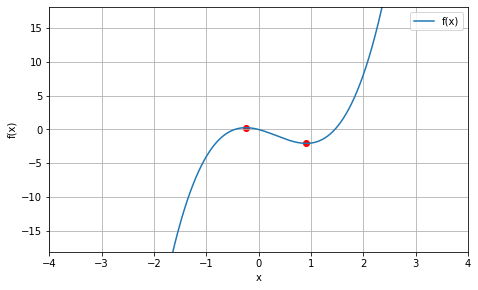

In [128]:
# Beispielaufruf
x_values = x = np.linspace(-10,10,10000) 

stationary_points,clas = find_stationary_points(f, x_values)


plt.figure(figsize=(7.5, 4.5))
plt.plot(x_values, f(x_values), label='f(x)')

print(stationary_points)
print(clas)
for point in stationary_points:
    plt.scatter(point, f(point), color="red")

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(-18,18)
plt.xlim(-4,4)
plt.show()


<div style="color: black; background-color: powderblue; margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color: black; background-color: lightskyblue; margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 3</b></p> 

In dieser Aufgabe verwenden Sie die Bibliothek Sympy, um Extremstellen (Maxima und Minima) einer gegebenen Funktion zu identifizieren und zu klassifizieren. 

**Anforderungen:**

1. **Implementierung der Funktion `find_stationary_points(f)`:**
   - Die Funktion `find_stationary_points(f)` soll mithilfe von Sympy die Extremstellen der Funktion `f` identifizieren.
   - Verwenden Sie innerhalb dieser Funktion `sp.diff(f, x)` zur Berechnung der ersten Ableitung von `f` und `sp.diff(f, x, 2)` für die zweite Ableitung.

2. **Ermittlung der stationären Punkte:**
   - Bestimmen Sie die stationären Punkte (Nullstellen der ersten Ableitung) von `f` mit dem Befehl `sp.solveset(f_first_derivative, x)`.

3. **Klassifizierung der stationären Punkte:**
   - Klassifizieren Sie jeden gefundenen stationären Punkt als "Hochpunkt" (Maximum) oder "Tiefpunkt" (Minimum), basierend auf dem Vorzeichen der zweiten Ableitung an diesen Punkten.
   - Ein stationärer Punkt wird als "Tiefpunkt" klassifiziert, wenn die zweite Ableitung an diesem Punkt positiv ist; er wird als "Hochpunkt" klassifiziert, wenn die zweite Ableitung negativ ist.

4. **Rückgabe der Ergebnisse:**
   - Die Funktion sollte eine Liste von Tupeln zurückgeben. Jedes Tupel soll einen stationären Punkt (in der Form eines Sympy-Ausdrucks oder einer Zahl) und seine Klassifizierung (entweder "Hochpunkt" oder "Tiefpunkt") enthalten.



In [137]:
# ???
def find_stationary_points(f):
    x = sp.symbols('x')

    f_first_derivative = sp.diff(f, x)
    f_second_derivative = sp.diff(f, x, 2)
    solutions = sp.solveset(f_first_derivative, x)

    stationary_points_and_curv = []
    
    for point in solutions:
        left_concavity = "tief" if f_second_derivative.subs(x, point) > 0 else "hoch"
        stationary_points_and_curv.append((point, left_concavity))

    return stationary_points_and_curv

In [138]:
# Beispielaufruf
x = sp.symbols('x')
f = 3*x**3 - 3*x**2 - 2*x

print("Extremstellen:", find_stationary_points(f))

Extremstellen: [(1/3 - sqrt(3)/3, 'hoch'), (1/3 + sqrt(3)/3, 'tief')]


# Wendestellen

Eine Wendestelle oder Umkehrpunkt ist ein Punkt auf dem Graphen einer Funktion, an dem die Funktion ihre Krümmungsrichtung ändert. Man kann sich eine Wendestelle als einen Punkt vorstellen, an dem die Funktion von "nach unten gekrümmt" zu "nach oben gekrümmt" wechselt, oder umgekehrt.

Um eine Wendestelle zu identifizieren, wird die zweite Ableitung der Funktion, auch bekannt als die Funktion der Krümmung, herangezogen. An einer Wendestelle wechselt die zweite Ableitung ihr Vorzeichen.

Formal lässt sich sagen, dass für eine Funktion $f(x)$, der Punkt $x = a$ eine Wendestelle ist, wenn:

1. Die zweite Ableitung existiert in einer offenen Umgebung um $a$, mit Ausnahme möglicherweise bei $a$ selbst.

2. Die zweite Ableitung ändert ihr Vorzeichen bei $a$ (von positiv zu negativ oder von negativ zu positiv).

Es ist zu beachten, dass nicht jeder Punkt, an dem die zweite Ableitung null ist, eine Wendestelle ist. Man muss tatsächlich überprüfen, dass ein Vorzeichenwechsel vorliegt. Im Fall, dass $f''(a) = 0$ und kein Vorzeichenwechsel vorliegt, ist der Punkt $a$ kein Wendepunkt.

In einigen Fällen, muss man sogar die höheren Ableitungen prüfen, um festzustellen, ob ein Punkt eine Wendestelle ist.

Nun sind Sie wieder an der Reihe. Vervollständigen Sie die nachfolgende Methode um die Wendestlle einer Funktion mithilfe von Sympy zu finden.


<div style="color: black; background-color: powderblue; margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color: black; background-color: lightskyblue; margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 3</b></p> 

**Aufgabe 3**

Ziel dieser Aufgabe ist es, die Wendepunkte und das Krümmungsverhalten einer vorgegebenen Funktion zu analysieren und zu berechnen, indem Sie die Sympy-Bibliothek verwenden. Sie werden eine Methode entwickeln, die sowohl die Wendepunkte als auch das Krümmungsverhalten der Funktion an diesen Punkten bestimmt.

**Anforderungen:**

1. **Entwicklung der Methode `inflection_and_concavity(f)`:**
   - Implementieren Sie eine Funktion `inflection_and_concavity(f)`, die die Wendepunkte einer Funktion `f` findet und das Krümmungsverhalten an diesen Punkten analysiert.
   - Verwenden Sie `sp.diff(f, x, 2)` zur Berechnung der zweiten Ableitung von `f`.

2. **Identifizierung von Wendepunkten:**
   - Bestimmen Sie die Wendepunkte der Funktion `f`, indem Sie die Nullstellen der zweiten Ableitung mithilfe von `sp.solveset(f_second_derivative, x)` ermitteln. Die Nullstellen der zweiten Ableitung sind die Wendepunkte.

3. **Analyse des Krümmungsverhaltens:**
   - Untersuchen Sie das Krümmungsverhalten links und rechts von jedem Wendepunkt. Dazu überprüfen Sie den Wert der zweiten Ableitung kurz vor und kurz nach jedem Wendepunkt (z.B. bei `point - 1e-6` und `point + 1e-6`).
   - Klassifizieren Sie das Krümmungsverhalten als "konvex" oder "konkav", abhängig davon, ob die zweite Ableitung an diesen Stellen positiv (konvex) oder negativ (konkav) ist.

4. **Rückgabe der Ergebnisse:**
   - Die Methode `inflection_and_concavity` sollte eine Liste von Tupeln zurückgeben. Jedes Tupel besteht aus einem Wendepunkt und seinem Krümmungsverhalten links und rechts davon (z.B. `(point, left_concavity, right_concavity)`).

</div>


Wendestellen und Krümmung: [(-1.15070900594776, 'hoch', 'runter'), (1.20070900594776, 'runter', 'hoch')]


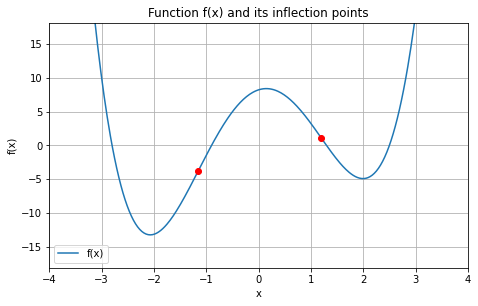

In [139]:
# ???
def inflection_and_concavity(f):
    x = sp.symbols('x')

    f_second_derivative = sp.diff(f, x, 2)

    solutions = sp.solveset(f_second_derivative, x)

    inflection_points_and_concavities = []
    for point in solutions:
        left_concavity = "hoch" if f_second_derivative.subs(x, point - 1e-6) > 0 else "runter"
        right_concavity = "hoch" if f_second_derivative.subs(x, point + 1e-6) > 0 else "runter"
        inflection_points_and_concavities.append((point, left_concavity, right_concavity))

    return inflection_points_and_concavities

x = sp.symbols('x')
f = (x + 0.9) * (x - 1.3) * (x - 2.5) * (x + 2.8)

inflection_points_and_concavities = inflection_and_concavity(f)

print("Wendestellen und Krümmung:", inflection_points_and_concavities)

# ???
x_values = np.linspace(-10, 10, 1000)
y_values = [f.subs(x, val) for val in x_values]

plt.figure(figsize=(7.5, 4.5))
plt.plot(x_values, y_values, label='f(x)')

for point, _, _ in inflection_points_and_concavities:
    plt.plot(point, f.subs(x, point), 'ro')

plt.title('Function f(x) and its inflection points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.ylim(-18,18)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

# Grenzwert mit Sympy

Der Begriff "Grenzwert" beschreibt das Verhalten einer Funktion, wenn sich ihr Argument einem bestimmten Wert nähert. Es gibt verschiedene Arten von Grenzwerten, darunter:

1. Grenzwerte an einer Stelle: Man möchte herausfinden, welchen Wert $ f(x) $ annimmt oder sich nähert, wenn $ x $ gegen eine bestimmte Zahl strebt. Symbolisch wird dies oft so ausgedrückt:
$ \lim_{{x \to a}} f(x) = L $
Das bedeutet, dass $ f(x) $ gegen den Wert $L $ strebt, wenn $ x $ sich dem Wert $a $ nähert.

1. Grenzwerte im Unendlichen: Man möchte herausfinden, welchen Wert $ f(x) $ annimmt oder sich nähert, wenn $ x $ gegen Unendlich (oder minus Unendlich) strebt. Zum Beispiel:
$ \lim_{{x \to \infty}} f(x) = L $



Eine kurze Einführung in die Berechnung von Grenzwerten mit Sympy:

In [3]:
from sympy import symbols, limit, oo  # oo steht für Unendlich in SymPy

# Definieren Sie die Variablen
x = symbols('x')

# Definieren Sie die Funktion
f = 1/x

# Grenzwert von f, wenn x gegen 0 von der rechten Seite strebt
limit_value_right = limit(f, x, 0, dir='+')
print(f"Der Grenzwert von f(x) = 1/x, wenn x gegen 0 von rechts strebt, ist: {limit_value_right}")

# Grenzwert von f, wenn x gegen 0 von der linken Seite strebt
limit_value_left = limit(f, x, 0, dir='-')
print(f"Der Grenzwert von f(x) = 1/x, wenn x gegen 0 von links strebt, ist: {limit_value_left}")

# Grenzwert von f, wenn x gegen Unendlich strebt
limit_value_infinity = limit(f, x, oo)
print(f"Der Grenzwert von f(x) = 1/x, wenn x gegen Unendlich strebt, ist: {limit_value_infinity}")

# Grenzwert von f, wenn x gegen 2 strebt
lim_at_2 = limit(f, x, 2)
print(f"Der Grenzwert von f(x) = 1/x, wenn x gegen 2 strebt, ist: {lim_at_2}")

Der Grenzwert von f(x) = 1/x, wenn x gegen 0 von rechts strebt, ist: oo
Der Grenzwert von f(x) = 1/x, wenn x gegen 0 von links strebt, ist: -oo
Der Grenzwert von f(x) = 1/x, wenn x gegen Unendlich strebt, ist: 0
Der Grenzwert von f(x) = 1/x, wenn x gegen 2 strebt, ist: 1/2


<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 4</b>  </p>

In dieser Aufgabe sollen Sie die Grenzwerte für Funktionen bestimmen. Dies sollen Sie mit Sympy tun und die Ergebnisse per Hand validieren.

1. Bestimmen Sie den Grenzwert für die Funktion $ \lim_{{x \to 0}} f(x) = x^2 - 3x + 2$.

2. Bestimmen Sie den Grenzwert für die Funktion $ \lim_{{x \to 0}} f(x) = \frac{x^2 +4 }{2x}$.

3. Bestimmen Sie den Grenzwert für die Funktion $ \lim_{{x \to 0}}f(x) = \frac{x}{|x|}$.
4. Bestimmen Sie den Grenzwert für die Funktion $ \lim_{{x \to 0^-}} f(x) = \sqrt{x}$.

**Tipp**:

Plotten Sie die Funktionen um die Ergebnisse von Sympy zu verifizieren.

**Wichtig:**

Hinterfragen Sie die Ergbnisse. Nur weil Sympy ein Ergebnis wiedergibt, bedeutet dies nicht direkt, dass dieses auch mathematisch korrekt ist. Begründen Sie somit auch, wieso das jeweilige Ergebnis korrekt oder inkorrekt ist.

7


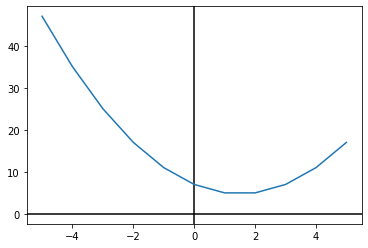

In [5]:
# Teilaufgabe 1
def f_poly(x):
    return  x**2 - 3*x + 7

x = sp.symbols('x')

limit = sp.limit(f_poly(x), x, 0)
print(limit)

fig, ax = plt.subplots()
x = np.arange(-5,6)
y = f_poly(x)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.plot(x,y)

oo


/Users/hakim/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


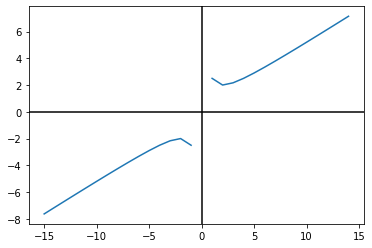

In [3]:
def f_frac(x):
    return (x**2 + 4)/(2*x)

x = sp.symbols("x")
limit = sp.limit(f_frac(x), x, 0)
print(limit)

fig, ax = plt.subplots()
x = np.arange(-15,15)
y = f_frac(x)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.plot(x,y)

1


/tmp/ipykernel_8016/1783473887.py:3: RuntimeWarning: invalid value encountered in divide
  return (x/abs(x))


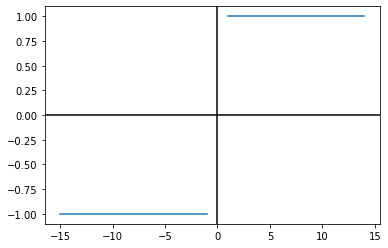

In [37]:
# Teilaufgabe 3
def f_abs(x):
    return (x/abs(x))

limit = sp.limit(f_abs(x), x, 0)
print(limit)

fig, ax = plt.subplots()
x = np.arange(-15,15)
y = f_abs(x)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.plot(x,y)

0


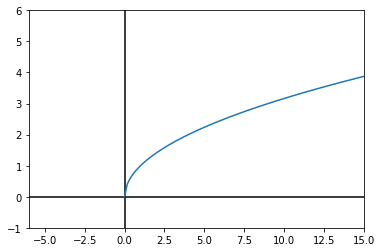

In [7]:
# Teilaufgabe 4  
def f_sqrt(x):
    return np.sqrt(x)

x = sp.symbols('x')
limit = sp.limit(sp.sqrt(x), x, 0,"-")
print(limit)

fig, ax = plt.subplots()
x = np.linspace(0, 16, 100)
y = f_sqrt(x)
plt.ylim(-1, 6)
plt.xlim(-6,15)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.plot(x,y)